# Python Machine Learning Notebook

In [3]:
import numpy as np
import pandas as pd

from pandas import DataFrame

import sklearn
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import tree

import matplotlib.pyplot as plt

### Loading in the dataset

In [7]:
#Importing CSV file using pandas read_csv method
data = pd.read_csv("Summer Data\datasets\Florida Dropout Rates.csv", sep=',', index_col=1)
data

,District #,Student Total,(%) Minority Rate,White %,Free,Reduced,(%) Poverty Rate,(%) Dropout Rate,(%) Discipline Rate,(Cat) Dropout Rate,...,(Cat) Poverty Status,(Cat) Minority Rate,(Cat) AP Participation,(Cat) AP Pass Rate,(Cat) ACT Test Takers,(Cat) Percent Present,Percent Present,AP Participation,AP Pass,(%) ACT Test Takers
District Name,,,,,,,,,,,,,,,,,,,,,
ALACHUA,1,28157,0.4403,0.4549,13496,1382,0.5284,0.024,0.0746,High,...,Safe,Below Average,Normal,High,Low,Safe,0.942,0.447156,0.621303,0.6051
BAKER,2,4985,0.1354,0.8333,2617,350,0.5952,0.004,0.1627,Safe,...,Safe,Below Average,High,Low,Low,Low,0.917,0.916667,0.041667,0.5836
BAY,3,27055,0.2114,0.7123,11932,2524,0.5343,0.014,0.1917,Safe,...,Safe,Below Average,Normal,High,Low,Safe,0.932,0.549970,0.504435,0.5769
BRADFORD,4,3238,0.2559,0.7112,1739,261,0.6177,0.015,0.2312,Safe,...,Safe,Below Average,Normal,Low,Low,Low,0.926,0.682927,0.414634,0.6382
BREVARD,5,71234,0.2774,0.6296,26157,3345,0.4142,0.006,0.1399,Safe,...,Safe,Below Average,Normal,High,High,Safe,0.952,0.558824,0.629027,1.0049
BROWARD,6,262663,0.6940,0.2409,137198,20260,0.5995,0.019,0.0806,Safe,...,Safe,Above Average,Normal,High,Low,Safe,0.936,0.550099,0.493097,0.5781
CALHOUN,7,2278,0.1782,0.7638,1332,196,0.6708,0.020,0.1260,Safe,...,High,Below Average,Normal,Low,Low,Low,0.915,NaN,NaN,0.7075
CHARLOTTE,8,16263,0.2211,0.7149,8296,1629,0.6103,0.024,0.1583,High,...,Safe,Below Average,Normal,Low,Low,Safe,0.953,0.650447,0.463754,0.5499
CITRUS,9,15069,0.1232,0.8161,8249,1291,0.6331,0.013,0.2470,Safe,...,High,Below Average,Normal,Low,Low,Safe,0.937,0.724882,0.327714,0.4582


### Data Preparation 

In [54]:
#Splitting data for training and testing
X = data.loc[:,['(%) Poverty Rate','Percent Present','(%) ACT Test Takers','AP Participation']]
y = data.loc[:,['(Cat) Dropout Rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.76, random_state=17)

In [55]:
gnb = GaussianNB()
y_gnb_score = gnb.fit(X_train, y_train).predict(X_test)
print(y_gnb_score)

y_expect = y_test
gnb_score = (accuracy_score(y_expect, y_gnb_score))
print(gnb_score)

gnb_score

['Safe' 'Safe' 'Safe' 'Safe' 'High' 'Safe' 'High' 'Safe' 'Safe' 'Safe'
 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe'
 'Safe' 'High' 'Safe' 'Safe' 'Safe' 'High' 'Safe' 'High' 'Safe' 'Safe'
 'High' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe'
 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'Safe' 'High']
0.6875


0.6875

### NaiveBayes Analysis

##### Gaussian NaiveBayes

In [56]:
#Converting into int arrays for finding ROC curves

def strtoint(array):
    newarray = []
    for i in range(len(array)):
        if array[i] == 'Safe':
            newarray.append(0)
        elif array[i] == 'High':
            newarray.append(1)
    #newarray = newarray.astype(int)
    return newarray

def objtoint(array):
    newarray = []
    for i in range(len(array)):
        if array.iloc[i,0] == 'Safe':
            newarray.append(0)
        elif array.iloc[i,0] == 'High':
            newarray.append(1)
    #newarray = newarray.astype(int)
    return newarray

In [57]:
y_Score = strtoint(y_gnb_score)

In [58]:
y_True = objtoint(y_test)

In [59]:
#I just want to see the values produced for manual calculations... 
TN = 0
FN = 0
TP = 0
FP = 0

for i in range(len(y_True)):
    if (y_Score[i] == 0 and y_True[i] == 0):
        TN += 1
    elif (y_Score[i] == 0 and y_True[i] == 1):
        FN += 1
    elif (y_Score[i] == 1 and y_True[i] == 0):
        FP += 1
    elif (y_Score[i] == 1 and y_True[i] == 1):
        TP += 1
    
print("\n True Negative: %d \n False Negative: %d \n False Positive: %d \n True Positive: %d " % (TN,FN,FP,TP))




 True Negative: 31 
 False Negative: 10 
 False Positive: 5 
 True Positive: 2 


In [60]:
gnb_fpr, gnb_tpr, _ = roc_curve(y_True, y_Score)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)
print(roc_auc_score(y_True,y_Score))
print(accuracy_score(y_True,y_Score))


0.513888888889
0.6875


In [ ]:
#Note to self:
#The AUC ROC is the P(predicted TRUE|actual TRUE) vs P(FALSE|FALSE), 
#while the overall accuracy is the P=P(TRUE|TRUE)*P(actual TRUE) + P(FALSE|FALSE)*P(actual FALSE).
#hence the low roc score and higher accuracy score

##### Multinomial NaiveBayes

In [61]:
MultiNB = MultinomialNB()

mNB_predic = MultiNB.fit(X_train, y_train).predict(X_test)
print(MultiNB)
print(accuracy_score(y_expect, mNB_predic))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.75


In [62]:
y_Score = strtoint(mNB_predic)
mNB_fpr, mNB_tpr, _ = roc_curve(y_True, y_Score)
mNB_roc_auc = auc(mNB_fpr, mNB_tpr)
print(roc_auc_score(y_True,y_Score))
print(accuracy_score(y_True,y_Score))

0.5
0.75


### Decision Trees

In [63]:
dtree = tree.DecisionTreeClassifier()

tree_predic = dtree.fit(X_train, y_train).predict(X_test)
print(MultiNB)
print(accuracy_score(y_expect, tree_predic))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.6875


In [64]:
y_Score = strtoint(tree_predic)
tree_fpr, tree_tpr, _ = roc_curve(y_True, y_Score)
tree_roc_auc = auc(tree_fpr, tree_tpr)
print(roc_auc_score(y_True,y_Score))
print(accuracy_score(y_True,y_Score))

0.569444444444
0.6875


### ROC Curve Computation

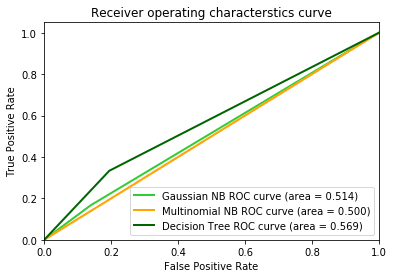

In [65]:
plt.figure()
lw = 2
plt.plot(gnb_fpr, gnb_tpr, color='limegreen',
        lw=lw, label='Gaussian NB ROC curve (area = %0.3f)' % gnb_roc_auc)
plt.plot([0,1],[0,1], color='pink', lw=lw, linestyle='--')
plt.plot(mNB_fpr, mNB_tpr, color='orange',
        lw=lw, label='Multinomial NB ROC curve (area = %0.3f)' % mNB_roc_auc)
plt.plot(tree_fpr, tree_tpr, color='darkgreen',
        lw=lw, label='Decision Tree ROC curve (area = %0.3f)' % tree_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterstics curve')
plt.legend(loc='lower right')
plt.show()